# ConvAge3  
Bigger SegNet architecture than ConvAge2, designed to respect the make the most out of MX150 GPU. 

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from data_utils import FaceData, FaceDataCropped
import time
import os

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.ion()   # interactive mode

In [2]:
train_data = FaceDataCropped(image_paths_file='LAG_background/train/train.txt')
val_data = FaceData(image_paths_file='LAG/val/val.txt')
test_data = FaceData(image_paths_file='LAG/train/train.txt')

Train size: 311
Validation size: 261
Img size:  torch.Size([3, 200, 200])
Segmentation size:  torch.Size([200, 200])


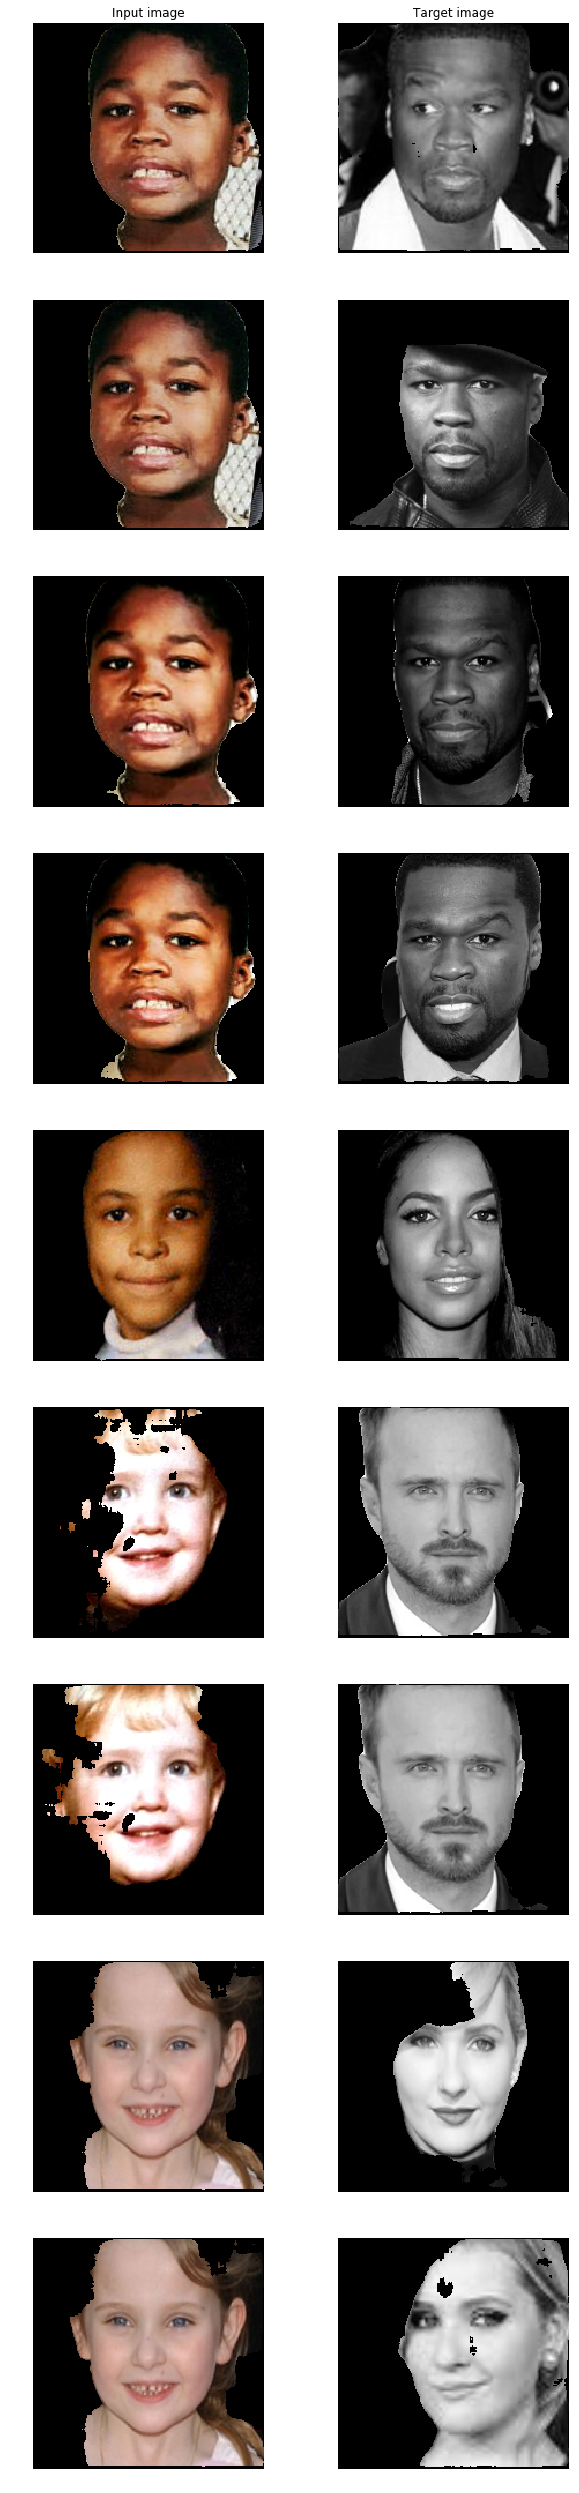

In [3]:
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))
print("Img size: ", train_data[0][0].size())
print("Segmentation size: ", train_data[0][1].size())

num_example_imgs = 9
plt.figure(figsize=(10, 5 * num_example_imgs))
for i, (img, target) in enumerate(train_data[:num_example_imgs]):
    # img
    plt.subplot(num_example_imgs, 2, i * 2 + 1)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.axis('off')
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 2, i * 2 + 2)
    targetsc = target.numpy() / 255
    plt.imshow(targetsc.reshape(200, 200), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Target image")
plt.show()

In [3]:
from classifiers.convage_nn_mse import ConvAgeNN
from solver_mse import Solver
import torch.nn.functional as F
import torchvision.models as models
import pandas as pd

numInitEpochs = 0

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=16,
                                           shuffle=True,
                                           num_workers=16)
val_loader = torch.utils.data.DataLoader(val_data,
                                         batch_size=16,
                                         shuffle=False,
                                         num_workers=16)
model = ConvAgeNN
print(len(list(model.parameters())))

for param in list(model.parameters())[:4]:
    param.requires_grad = False    
solver = Solver(optim_args={"lr": 1e-3,
                       "eps": 1e-8
                        },
         loss_func = torch.nn.MSELoss())

epochsIter = 20

for i in range(20):
    solver.train(model, train_loader, val_loader, log_nth=1, num_epochs=epochsIter)
    model.save('models/convage_nn_mse_' + str(numInitEpochs + (i+1) * epochsIter) + '_epochs.model')
    save_acc_loss_dic = {'train_loss_history': solver.train_loss_history,
                         'train_acc_history' : solver.train_acc_history ,
                         'val_acc_history'   : solver.val_acc_history   ,
                         'val_loss_history'  : solver.val_loss_history   }

    save_acc_loss = pd.DataFrame.from_dict(save_acc_loss_dic, orient='index')
    save_acc_loss.transpose()
    save_acc_loss.to_csv('history/save_acc_loss_convage_mse_' + str(numInitEpochs + (i+1) * epochsIter) + '_epochs.txt')

76
START TRAIN.
[Iteration 1/311] TRAIN loss: 11688.210
[Iteration 2/311] TRAIN loss: 9276.644
[Iteration 3/311] TRAIN loss: 17245.340
[Iteration 4/311] TRAIN loss: 16273.104
[Iteration 5/311] TRAIN loss: 6887.632
[Iteration 6/311] TRAIN loss: 12758.972
[Iteration 7/311] TRAIN loss: 10339.649
[Iteration 8/311] TRAIN loss: 13783.978
[Iteration 9/311] TRAIN loss: 11192.920
[Iteration 10/311] TRAIN loss: 12128.506
[Iteration 11/311] TRAIN loss: 14494.213
[Iteration 12/311] TRAIN loss: 13042.081
[Iteration 13/311] TRAIN loss: 20294.402
[Iteration 14/311] TRAIN loss: 12627.619
[Iteration 15/311] TRAIN loss: 12919.016
[Iteration 16/311] TRAIN loss: 16211.822
[Iteration 17/311] TRAIN loss: 11005.324
[Iteration 18/311] TRAIN loss: 12208.678
[Iteration 19/311] TRAIN loss: 7860.490
[Iteration 20/311] TRAIN loss: 10153.862
[Iteration 21/311] TRAIN loss: 11377.812
[Iteration 22/311] TRAIN loss: 7590.879
[Iteration 23/311] TRAIN loss: 16507.840
[Iteration 24/311] TRAIN loss: 12012.785
[Iteration 25

[Iteration 200/311] TRAIN loss: 7680.759
[Iteration 201/311] TRAIN loss: 15312.679
[Iteration 202/311] TRAIN loss: 14199.095
[Iteration 203/311] TRAIN loss: 16456.234
[Iteration 204/311] TRAIN loss: 22354.568
[Iteration 205/311] TRAIN loss: 10850.535
[Iteration 206/311] TRAIN loss: 14791.771
[Iteration 207/311] TRAIN loss: 14202.266
[Iteration 208/311] TRAIN loss: 6865.921
[Iteration 209/311] TRAIN loss: 16109.850
[Iteration 210/311] TRAIN loss: 6887.917
[Iteration 211/311] TRAIN loss: 14121.719
[Iteration 212/311] TRAIN loss: 14659.616
[Iteration 213/311] TRAIN loss: 10094.209
[Iteration 214/311] TRAIN loss: 11517.328
[Iteration 215/311] TRAIN loss: 8406.847
[Iteration 216/311] TRAIN loss: 15094.002
[Iteration 217/311] TRAIN loss: 16343.354
[Iteration 218/311] TRAIN loss: 9111.671
[Iteration 219/311] TRAIN loss: 19354.562
[Iteration 220/311] TRAIN loss: 15073.563
[Iteration 221/311] TRAIN loss: 10299.123
[Iteration 222/311] TRAIN loss: 7470.597
[Iteration 223/311] TRAIN loss: 9155.755

RuntimeError: Expected object of type Variable[torch.cuda.LongTensor] but found type Variable[torch.cuda.FloatTensor] for argument #1 'other'

In [18]:
model = torch.load('models/convage_nn_mse_80_epochs.model')

In [ ]:
model.cpu()

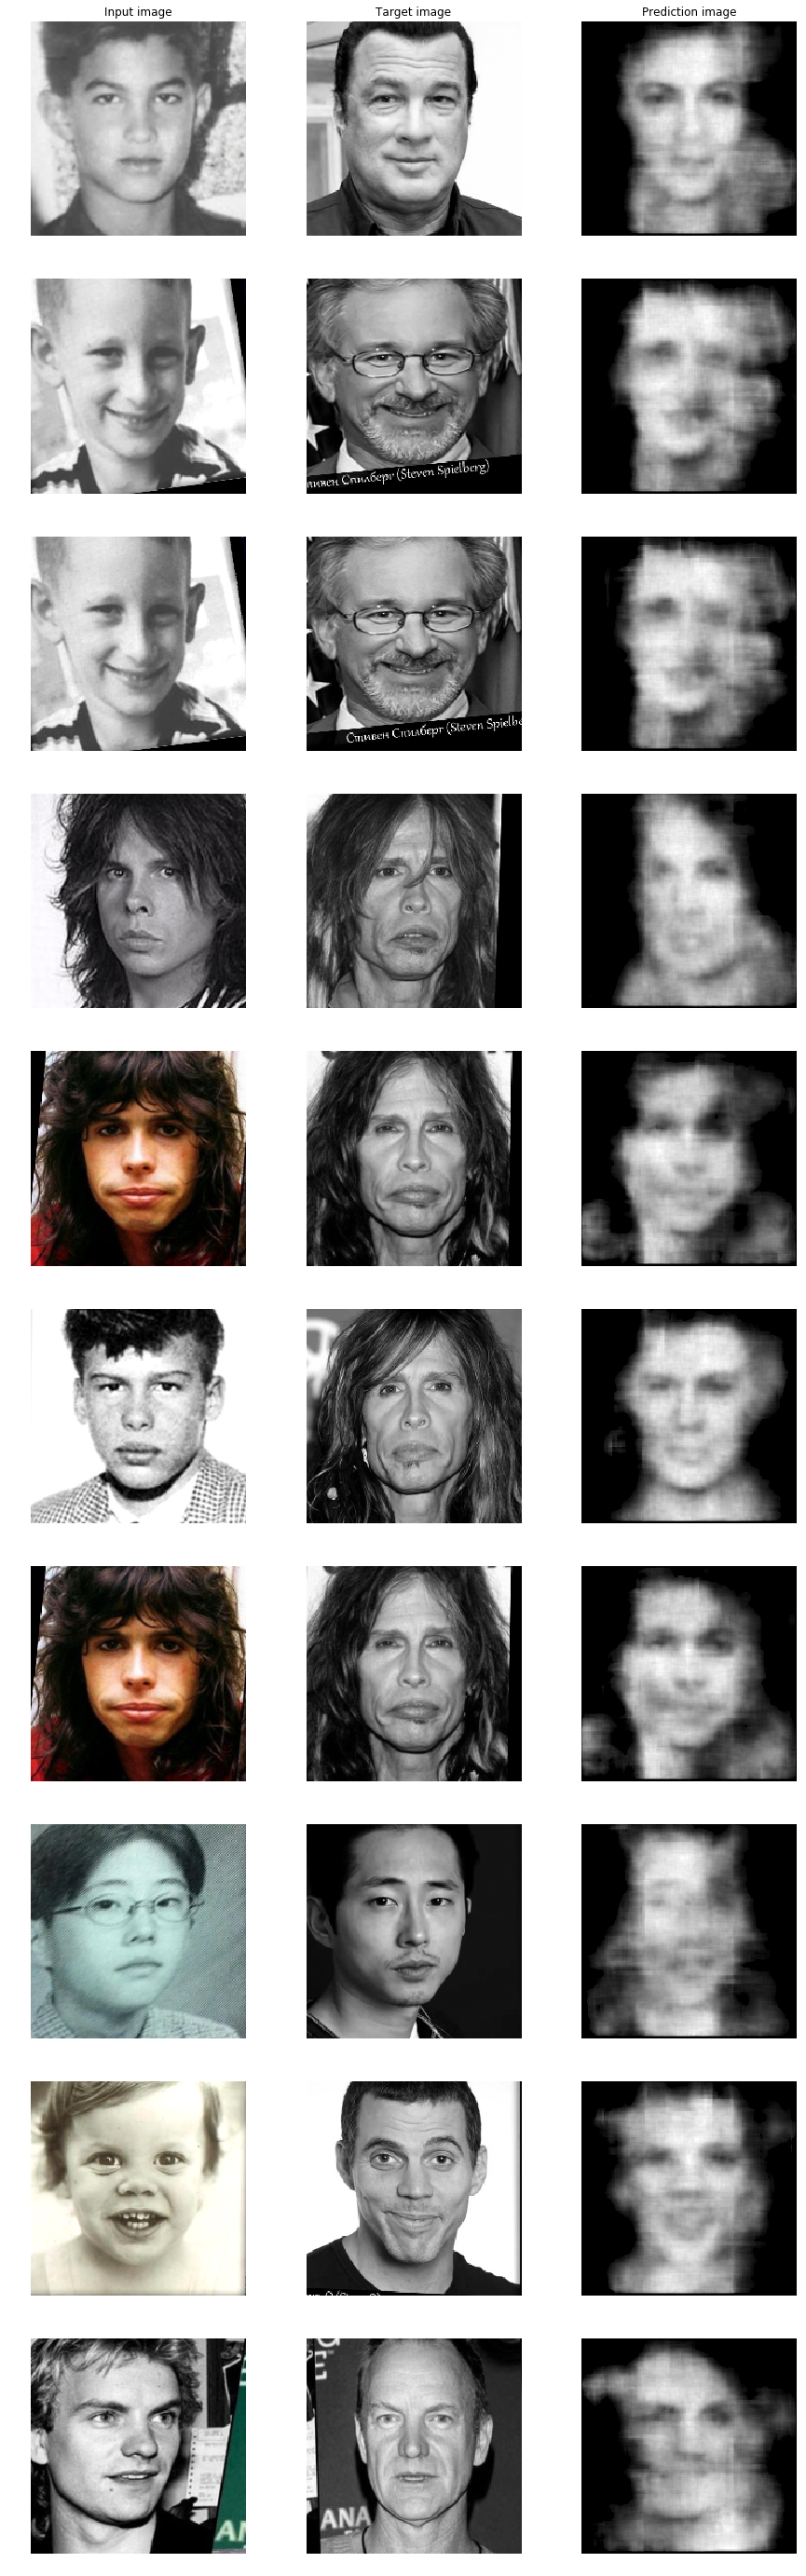

In [19]:
num_example_imgs = 10
plt.figure(figsize=(15, 5 * num_example_imgs))
for i, (img, target) in enumerate(val_data[100:100+num_example_imgs]):
    inputs = img.unsqueeze(0)
    inputs = Variable(inputs)
    if model.is_cuda:
        inputs = inputs.cuda()
    
    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    pred = outputs[0].data.cpu()
    img, target, pred = img.numpy(), target.numpy(), pred.numpy()
    
    # img
    plt.subplot(num_example_imgs, 3, i * 3 + 1)
    plt.axis('off')
    plt.imshow(img.transpose(1,2,0))
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 3, i * 3 + 2)
    plt.axis('off')
    target /= 255
    plt.imshow(target.reshape(200,200), cmap='gray')
    if i == 0:
        plt.title("Target image")

    # pred
    plt.subplot(num_example_imgs, 3, i * 3 + 3)
    plt.axis('off')
    plt.imshow(pred.reshape(200,200), cmap='gray')
    if i == 0:
        plt.title("Prediction image")
plt.show()